# Infopillar Solution

# Name- Pratibha Rakhama Antre

# Task1- Loan prediction using machine learning

# Dataset=http://lib.stat.cmu.edu/datasets/boston

# Project idea – The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Read the dataset

In [2]:
boston = load_boston()
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


# Clean & preprocess the data

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.data.size

6578

# Convert it into a DataFrame

In [5]:
boston_df=pd.DataFrame(boston.data)

In [6]:
boston_df.columns=boston.feature_names

In [7]:
boston_df['PRICE']=boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


# Plotting

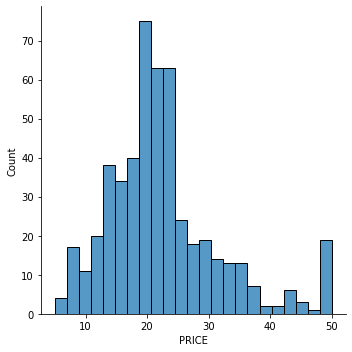

In [8]:
sns.displot(boston_df['PRICE'])

In [9]:
#To check is there any column null or not
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Divide the Dataset

In [10]:
X = boston_df.iloc[:,:-1].values
y = boston_df.iloc[:,-1].values

# Divide Dataset into Train and Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

# Build the model

In [12]:
linear_Regression_Model = LinearRegression()
linear_Regression_Model.fit(X_train,y_train)

LinearRegression()

In [13]:
#Value of m
print('Coefficients: \n',linear_Regression_Model.coef_)

Coefficients: 
 [-1.07418254e-01  5.22010486e-02  4.98839331e-02  3.01057658e+00
 -1.76082726e+01  3.67308035e+00  1.11587846e-02 -1.47581694e+00
  2.96069876e-01 -1.12908159e-02 -8.71508287e-01  9.76006235e-03
 -6.27739570e-01]


In [14]:
# Value of C
print("Value of C is :",linear_Regression_Model.intercept_)

Value of C is : 35.54288746845871


# Do the Prediction

In [15]:
y_pred = linear_Regression_Model.predict(X_test)

In [16]:
y_pred

array([19.45770639, 37.19931993, 25.12570498, 22.04299495, 24.0390742 ,
       35.05747632, 41.06247637, 24.71906144, 27.56081018, 21.97440284,
       13.98492549, 23.77895314, 23.95798135, 21.9046238 , 23.32527841,
       28.45009098, 33.57734904, 17.81687675, 23.39112491, 25.59623451,
       12.91547066, 20.19655606, 20.78434122, 19.63332874, 17.02608918,
       35.14546455, 22.88487269, 15.59625493, 23.52495483, 25.82525054,
       17.47918033, 27.63068766, 26.51307142, 20.77431267, 17.86850615,
       17.00308732, 34.57098727, 20.78936443, 21.26211944, 11.99603219,
       31.02787895, 37.99328397, 28.77055143, 31.03580241, 25.17559352,
       27.14684614, 17.93383898, 29.54029832, 26.14956244, 15.82026912,
       18.22109912, 20.10636887, 17.40298161, 24.24173726, 18.88102308,
       13.58084297, 34.78283907, 19.33259781, 20.76432096, 18.65511866,
       24.14761938, 25.57062518, 29.46123453, 27.49368177, 31.49636075,
       36.89202583, 19.92549096, 35.4941753 , 12.93393197, 12.93

# Evaluate the model

In [17]:
print("Mean Absolute Error     :",mean_absolute_error(y_pred,y_test))
print("Mean Squared Error      :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score is             :",r2_score(y_test,y_pred))

Mean Absolute Error     : 2.8760813890529957
Mean Squared Error      : 16.241848626738406
Root Mean Squared Error : 4.0301176939065195
R2 score is             : 0.7429669842220965


# Plot prediction line

/home/pratibhaantre/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

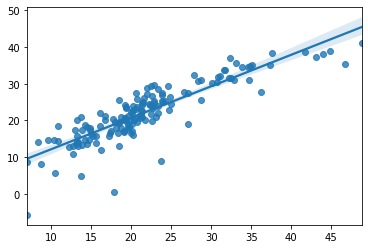

In [18]:
sns.regplot(y_test, y_pred)

# Conclusion- We have got the accuracy for model is 74.29% 